In [354]:
import numpy as np
import matplotlib.pyplot as plt
import scipy 
import sklearn 
import pandas as pd
import csv
import joblib
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

## Dataset
Valeurs des features et labels dans 2 fichiers différents

In [355]:
df_attributes = pd.read_csv('db_cali/alt_acsincome_ca_features_85(1).csv')
df_labels = pd.read_csv('db_cali/alt_acsincome_ca_labels_85.csv')

df_attributes

,AGEP,COW,SCHL,MAR,OCCP,POBP,RELP,WKHP,SEX,RAC1P
0,41.0,4.0,24.0,1.0,2555.0,6.0,1.0,60.0,2.0,1.0
1,77.0,7.0,22.0,1.0,4920.0,39.0,0.0,35.0,1.0,1.0
2,38.0,1.0,18.0,1.0,440.0,6.0,1.0,50.0,1.0,1.0
3,30.0,1.0,22.0,5.0,1555.0,6.0,2.0,80.0,1.0,6.0
4,36.0,1.0,16.0,1.0,4030.0,314.0,1.0,70.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...
166310,25.0,1.0,20.0,1.0,4720.0,6.0,7.0,8.0,2.0,1.0
166311,34.0,1.0,22.0,1.0,110.0,210.0,0.0,40.0,1.0,6.0
166312,54.0,3.0,18.0,1.0,7700.0,6.0,1.0,50.0,1.0,1.0
166313,39.0,1.0,16.0,5.0,9130.0,6.0,0.0,50.0,1.0,1.0


In [253]:
df_labels

,PINCP
0,True
1,True
2,False
3,True
4,False
...,...
166310,False
166311,True
166312,True
166313,True


(array([1.35137087e-02, 1.96778840e-02, 2.25452328e-02, 2.26404987e-02,
        2.24921337e-02, 2.10522124e-02, 1.47568512e-02, 2.01417198e-02,
        2.15129247e-02, 2.13520658e-02, 2.03041404e-02, 1.72681241e-02,
        1.09696394e-02, 4.86168673e-03, 3.43269754e-03, 1.80692950e-03,
        8.21473569e-04, 3.59199469e-04, 1.57735419e-04, 7.34016307e-05]),
 array([17.  , 20.85, 24.7 , 28.55, 32.4 , 36.25, 40.1 , 43.95, 47.8 ,
        51.65, 55.5 , 59.35, 63.2 , 67.05, 70.9 , 74.75, 78.6 , 82.45,
        86.3 , 90.15, 94.  ]),
 <BarContainer object of 20 artists>)

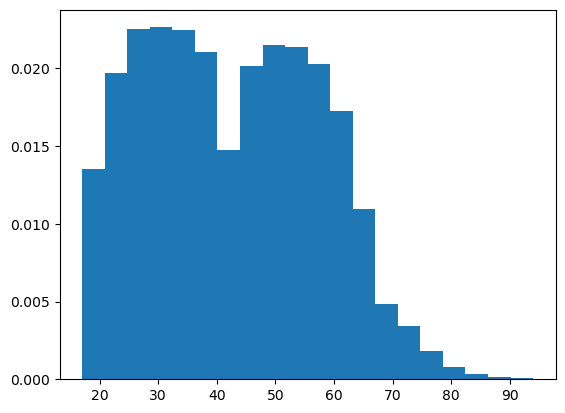

In [254]:
plt.hist(df_attributes["AGEP"], bins=20, density=True)
# todo: change y values for percentages ?

(array([7.73299161e-01, 5.48657668e-02, 8.25992845e-03, 9.01903015e-05,
        0.00000000e+00, 2.90112137e-03, 2.08174248e-01, 4.05104771e-03,
        1.45777591e-01, 5.25809458e-02]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <BarContainer object of 10 artists>)

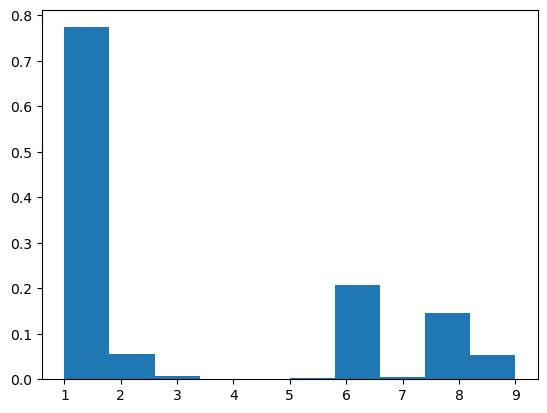

In [255]:
plt.hist(df_attributes["RAC1P"], density=True)

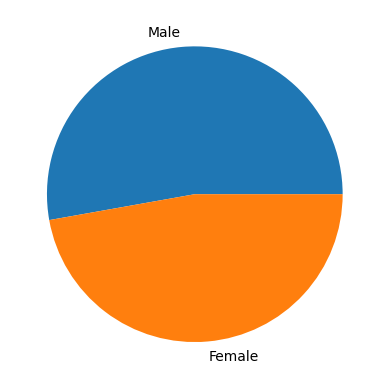

In [256]:
count = df_attributes.SEX.value_counts()
labels = ['Male', 'Female']
plt.pie(count, labels=labels)
plt.show()

(array([0.93302296, 0.1007125 , 0.11546935, 0.        , 0.06063365,
        0.03671175, 0.        , 0.12161947, 0.0562358 , 0.00416593]),
 array([1. , 1.7, 2.4, 3.1, 3.8, 4.5, 5.2, 5.9, 6.6, 7.3, 8. ]),
 <BarContainer object of 10 artists>)

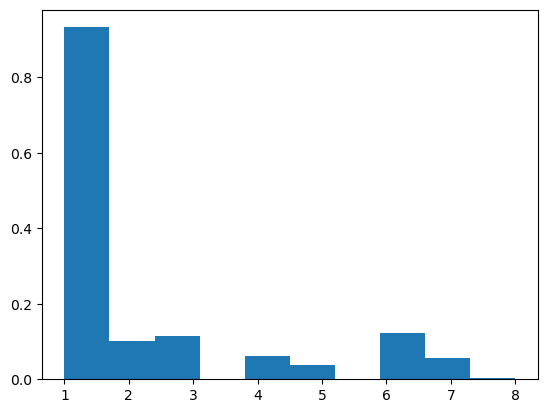

In [257]:
# extra: import geopandas as gpd
plt.hist(df_attributes["COW"], density=True)


(array([0.00785832, 0.00083655, 0.00216195, 0.00945299, 0.00771715,
        0.01059017, 0.09267642, 0.10048507, 0.13826827, 0.06473572]),
 array([ 1. ,  3.3,  5.6,  7.9, 10.2, 12.5, 14.8, 17.1, 19.4, 21.7, 24. ]),
 <BarContainer object of 10 artists>)

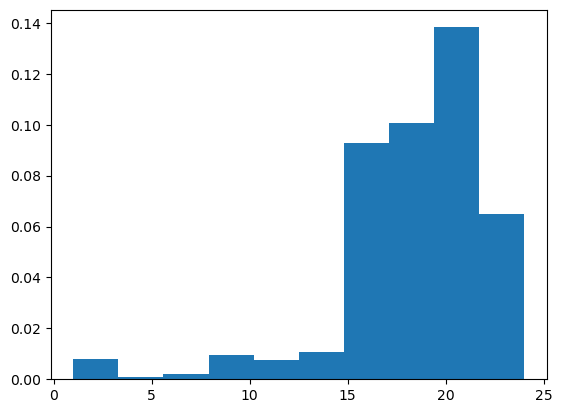

In [258]:
plt.hist(df_attributes["SCHL"], density=True)

(array([1.30963834, 0.        , 0.04208881, 0.        , 0.        ,
        0.22628747, 0.        , 0.04852238, 0.        , 0.87346301]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

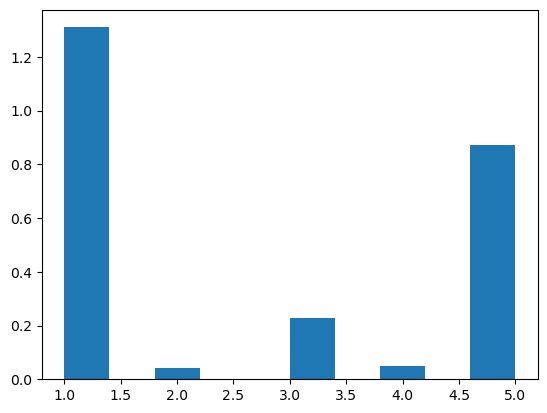

In [259]:
plt.hist(df_attributes["MAR"], density=True)

(array([1.70320680e-04, 7.42034124e-05, 1.25501060e-04, 1.04970980e-04,
        2.14350446e-04, 1.21808952e-04, 6.16269779e-05, 3.83844535e-05,
        2.44364897e-05, 8.27264877e-05]),
 array([  10.,  992., 1974., 2956., 3938., 4920., 5902., 6884., 7866.,
        8848., 9830.]),
 <BarContainer object of 10 artists>)

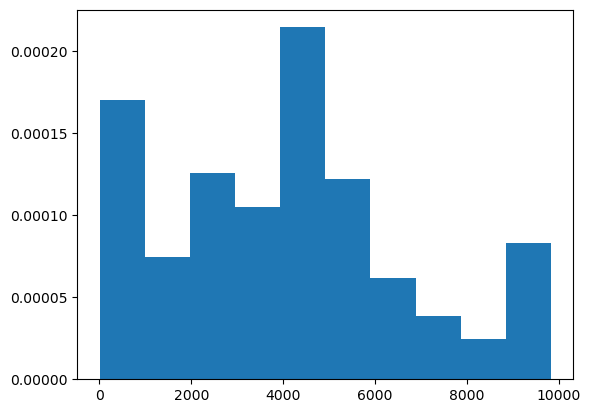

In [260]:
plt.hist(df_attributes["OCCP"], density=True)

(array([1.21657420e-02, 1.64180055e-04, 3.60869935e-04, 1.25461831e-03,
        1.18035674e-03, 2.61829132e-03, 1.75487820e-04, 8.00241856e-05,
        3.16399973e-05, 5.19722292e-05]),
 array([  1. ,  56.3, 111.6, 166.9, 222.2, 277.5, 332.8, 388.1, 443.4,
        498.7, 554. ]),
 <BarContainer object of 10 artists>)

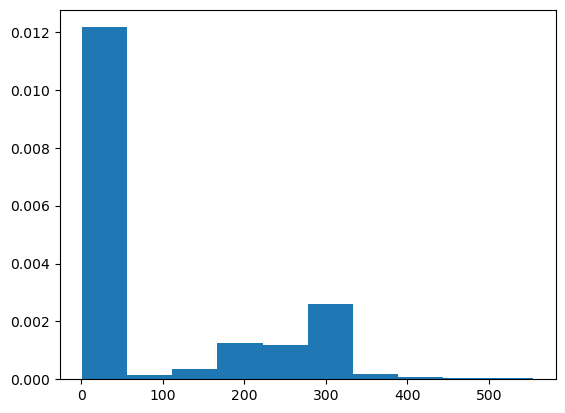

In [261]:
plt.hist(df_attributes["POBP"], density=True)

(array([0.40398535, 0.07859996, 0.01405908, 0.00583938, 0.00543971,
        0.01454717, 0.0048632 , 0.03719024, 0.00780235, 0.01590886]),
 array([ 0. ,  1.7,  3.4,  5.1,  6.8,  8.5, 10.2, 11.9, 13.6, 15.3, 17. ]),
 <BarContainer object of 10 artists>)

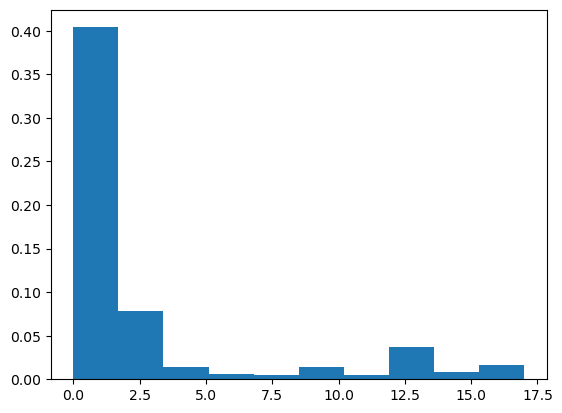

In [262]:
plt.hist(df_attributes["RELP"], density=True)

(array([0.00440583, 0.00921352, 0.01070442, 0.05470195, 0.00711644,
        0.00991725, 0.00408311, 0.00094301, 0.0006479 , 0.00030738]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <BarContainer object of 10 artists>)

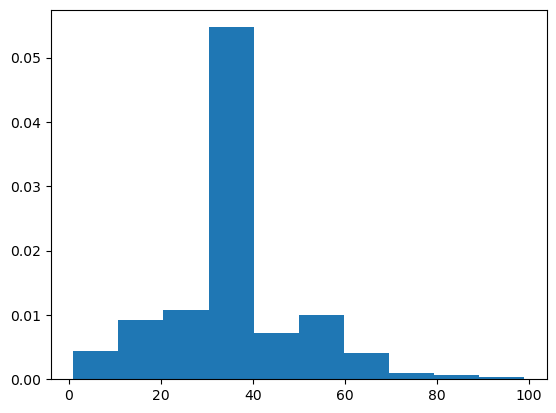

In [263]:
plt.hist(df_attributes["WKHP"], density=True)

### Partitionner le jeu de données

On garde 20% du dataset pour la phase de test, et 10% pour la validation. La fonction train_test_split randomise automatiquement la répartition des lignes entre train et test.

In [356]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(df_attributes, df_labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

X_train


,AGEP,COW,SCHL,MAR,OCCP,POBP,RELP,WKHP,SEX,RAC1P
165496,35.0,1.0,21.0,5.0,1306.0,6.0,13.0,40.0,1.0,1.0
157067,43.0,1.0,21.0,1.0,310.0,247.0,1.0,40.0,1.0,6.0
36293,38.0,1.0,19.0,5.0,8225.0,6.0,2.0,46.0,1.0,8.0
151543,42.0,1.0,19.0,1.0,705.0,6.0,1.0,40.0,1.0,2.0
148747,32.0,2.0,21.0,4.0,2145.0,27.0,0.0,60.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...
20563,22.0,1.0,19.0,5.0,3500.0,247.0,10.0,40.0,2.0,6.0
45414,29.0,1.0,21.0,5.0,110.0,39.0,0.0,50.0,1.0,1.0
92206,51.0,2.0,21.0,1.0,4020.0,6.0,1.0,10.0,2.0,6.0
52487,31.0,1.0,19.0,1.0,4720.0,4.0,0.0,32.0,2.0,1.0


In [265]:
df_attributes.describe()

,AGEP,COW,SCHL,MAR,OCCP,POBP,RELP,WKHP,SEX,RAC1P
count,166315.000000,166315.000000,166315.000000,166315.000000,166315.000000,166315.000000,166315.000000,166315.000000,166315.000000,166315.000000
mean,42.736235,2.144551,18.470054,2.653633,4019.729279,94.364718,2.506617,37.859255,1.471972,3.071623
std,14.882790,1.888220,3.938362,1.846417,2638.167883,123.472067,4.443905,13.014087,0.499215,2.916045
min,17.000000,1.000000,1.000000,1.000000,10.000000,1.000000,0.000000,1.000000,1.000000,1.000000
25%,30.000000,1.000000,16.000000,1.000000,2014.000000,6.000000,0.000000,32.000000,1.000000,1.000000
50%,42.000000,1.000000,19.000000,1.000000,4110.000000,9.000000,1.000000,40.000000,1.000000,1.000000
75%,55.000000,3.000000,21.000000,5.000000,5521.000000,212.000000,2.000000,40.000000,2.000000,6.000000
max,94.000000,8.000000,24.000000,5.000000,9830.000000,554.000000,17.000000,99.000000,2.000000,9.000000


### Standardiser les valeurs "continues" : âge & nombre d'heures au travail

In [266]:
# from sklearn.preprocessing import StandardScaler

# columns_to_standardize = ['AGEP', 'WKHP']
# scaler_agep = StandardScaler()
# scaler_wkhp = StandardScaler()


# X_train['AGEP'] = scaler_agep.fit_transform(X_train[['AGEP']])
# X_test['AGEP'] = scaler_agep.transform(X_test[['AGEP']])

# X_train['WKHP'] = scaler_wkhp.fit_transform(X_train[['WKHP']])
# X_test['WKHP'] = scaler_wkhp.transform(X_test[['WKHP']])

# X_test.head()

In [359]:
columns_to_standardize = ["AGEP", "WKHP"]
scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[columns_to_standardize] = scaler.fit_transform(X_train_scaled[columns_to_standardize])
X_test_scaled[columns_to_standardize] = scaler.transform(X_test_scaled[columns_to_standardize])

# X_train['WKHP'] = scaler_wkhp.fit_transform(X_train[['WKHP']])
# X_test['WKHP'] = scaler_wkhp.transform(X_test[['WKHP']])

X_test_scaled
# X_test

,AGEP,COW,SCHL,MAR,OCCP,POBP,RELP,WKHP,SEX,RAC1P
21546,0.017536,3.0,23.0,1.0,2310.0,254.0,1.0,0.161922,2.0,1.0
116870,0.219024,4.0,16.0,1.0,3424.0,233.0,0.0,0.161922,1.0,6.0
96563,-0.654089,1.0,7.0,5.0,6260.0,303.0,12.0,0.161922,1.0,1.0
92421,1.427949,3.0,19.0,3.0,3602.0,6.0,0.0,1.700229,1.0,1.0
79799,-0.922739,1.0,19.0,5.0,5230.0,6.0,0.0,0.161922,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...
78472,0.890649,2.0,22.0,1.0,1530.0,213.0,1.0,0.161922,1.0,1.0
49911,0.621999,1.0,21.0,1.0,800.0,233.0,0.0,0.161922,1.0,6.0
107964,-0.654089,1.0,20.0,5.0,4720.0,6.0,10.0,-0.991808,2.0,1.0
137985,-0.721251,1.0,17.0,1.0,4110.0,207.0,1.0,0.315753,2.0,6.0


In [360]:
joblib.dump(scaler , 'scaler.joblib')

['scaler.joblib']

(array([0.24671061, 0.33676854, 0.32286503, 0.26058183, 0.31868268,
        0.2807508 , 0.11754199, 0.03938521, 0.00862308, 0.00176014]),
 array([-1.72868902, -1.21153767, -0.69438632, -0.17723498,  0.33991637,
         0.85706772,  1.37421907,  1.89137041,  2.40852176,  2.92567311,
         3.44282445]),
 <BarContainer object of 10 artists>)

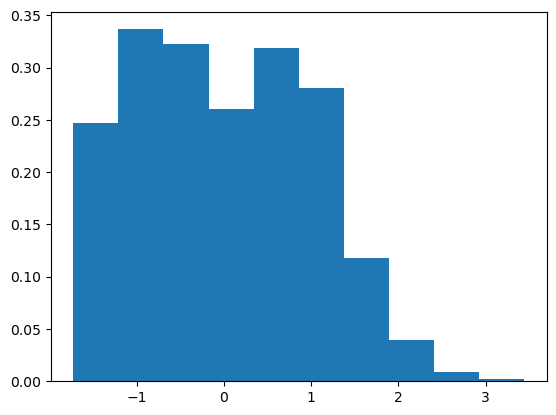

In [269]:
plt.hist(X_train['AGEP'], density=True)

###TODO : Conservez le calcul effectué pour la standardisation du jeu de données en utilisant le pa-
ckage joblib https://joblib.readthedocs.io/en/latest/index.html#module-joblib
et plus spécifiquement la méthode dump pour conserver un objet Python dans un fichier.

### 3. Recherche de bons modèles

3.1. Random Forest


3.1.1. Qualité d’apprentissage avec le paramétrage par défaut.


In [361]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

y_pred_rf

/home/acazeneu/.conda/envs/clustering-tp/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


array([ True,  True, False, ..., False, False, False])

In [362]:
accuracy = accuracy_score(y_test, y_pred_rf)
f_score = f1_score(y_test, y_pred_rf)

print("Accuracy: ", accuracy, f"\nF1 Score: ", f_score)

Accuracy:  0.8151700087183958 
F1 Score:  0.7728515480676864


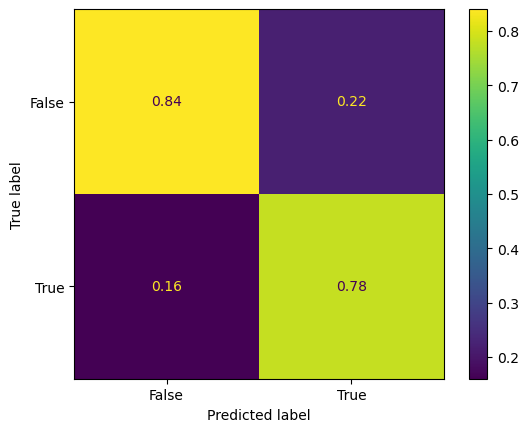

In [272]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, normalize='pred')

validation croisée (TP2 sacha alone sad snif snif)

In [273]:
from sklearn.model_selection import cross_val_predict

y_cross_pred= cross_val_predict(rf,X_train_scaled,y_train,cv=5)
accuracy_cross = accuracy_score(y_train,y_cross_pred)


print("Accuracy: ", accuracy_cross)
#on utilise pas test car le dataset est deja assez grand


/home/acazeneu/.conda/envs/clustering-tp/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/acazeneu/.conda/envs/clustering-tp/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/acazeneu/.conda/envs/clustering-tp/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/acazeneu/.conda/envs/clustering-tp/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: 

Accuracy:  0.8119018589347452


In [274]:
f_score_cross = f1_score(y_train, y_cross_pred)
print(f"\nF1 Score avec valisation croisée: ", f_score_cross)
print(f"\nF1 Score ", f_score)


F1 Score avec valisation croisée:  0.7674437813616372

F1 Score  0.7743481948593134


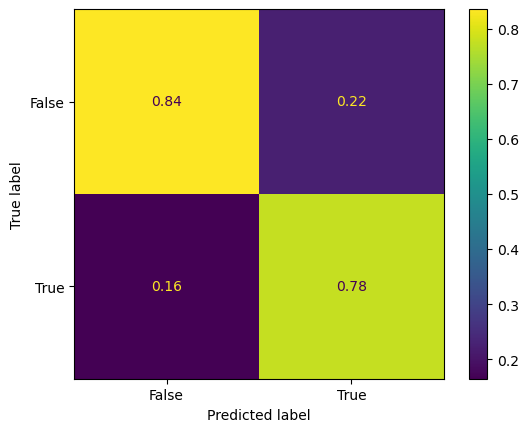

In [275]:
disp = ConfusionMatrixDisplay.from_predictions(y_train, y_cross_pred, normalize='pred')

3.1.2 Amélioration du modèle Random Forest



In [276]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [277]:
X_small, _,y_small, _ = train_test_split(X_train_scaled, y_train, test_size=0.5, random_state=42)

#On prend 60% du set de test pour accelerer


In [278]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [10, 50, 100],       # Nombre d'arbres
    'max_depth': [None, 10, 20],        # Profondeur maximale de l'arbre
    'min_samples_split': [2, 5, 10],    # Minimum d'échantillons pour diviser un nœud
    'min_samples_leaf': [1, 2, 4]       # Minimum d'échantillons dans une feuille
}

rf_cv = GridSearchCV(estimator=rf, 
                           param_grid=param_grid, 
                           cv=5,             # Nombre de plis pour la validation croisée
                           scoring='accuracy',  # Métrique d'évaluation
                           verbose=2)        # Utiliser tous les cœurs pour accélérer


# rf_cv.fit(X_small, y_small)





In [279]:
"""print("Meilleurs paramètres :",rf_cv.best_params_)

# Meilleur score obtenu
print("Meilleur score :", rf_cv.best_score_)

# Modèle ajusté avec les meilleurs paramètres
best_model_rf = rf_cv.best_estimator_

# Évaluer sur l'ensemble de test
test_accuracy = best_model_rf.score(X_test, y_test)
print("accuracy :", test_accuracy)"""


'print("Meilleurs paramètres\xa0:",rf_cv.best_params_)\n\n# Meilleur score obtenu\nprint("Meilleur score\xa0:", rf_cv.best_score_)\n\n# Modèle ajusté avec les meilleurs paramètres\nbest_model_rf = rf_cv.best_estimator_\n\n# Évaluer sur l\'ensemble de test\ntest_accuracy = best_model_rf.score(X_test, y_test)\nprint("accuracy\xa0:", test_accuracy)'

In [363]:
best_model_rf = RandomForestClassifier(max_depth=None, min_samples_leaf=3, min_samples_split=5, n_estimators=150)
best_model_rf.fit(X_train_scaled, y_train)

/home/acazeneu/.conda/envs/clustering-tp/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(min_samples_leaf=3, min_samples_split=5,
                       n_estimators=150)

In [364]:
y_pred = best_model_rf.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: ", accuracy, "\nF1 Score: ", f1)


Accuracy:  0.8192886991552175 
F1 Score:  0.7775598564186064


3.1.3  Enregistrement du meilleur modèle Rf

In [365]:
joblib.dump(best_model_rf,'RandomForest_BestModel_08196.joblib')

['RandomForest_BestModel_08196.joblib']

2. AdaBoost

In [366]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier()
ab.fit(X_train_scaled, y_train)

y_pred_ab = ab.predict(X_test_scaled)

/home/acazeneu/.conda/envs/clustering-tp/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/acazeneu/.conda/envs/clustering-tp/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy:  0.8083155458016414 
F1 Score:  0.7651911320615747


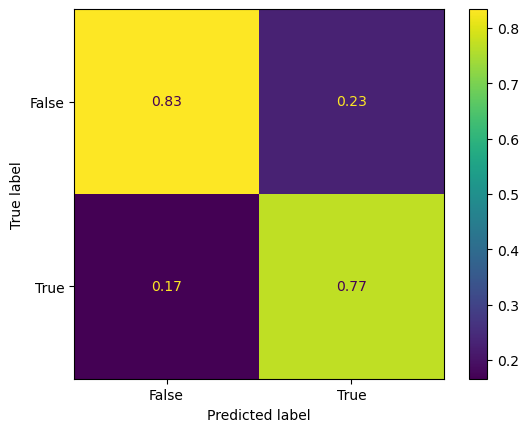

In [367]:
accuracy = accuracy_score(y_test, y_pred_ab)

f_score = f1_score(y_test, y_pred_ab)

print("Accuracy: ", accuracy, f"\nF1 Score: ", f_score)

disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_ab, normalize='pred')

validation croisée

/home/acazeneu/.conda/envs/clustering-tp/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/acazeneu/.conda/envs/clustering-tp/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/acazeneu/.conda/envs/clustering-tp/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/acazeneu/.conda/envs/clustering-tp/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R a

Accuracy cross validation Ada boost:  0.8091042707063284

F1 Score Ada boost avec valisation croisée:  0.764783964273587

F1 Score  0.7651911320615747


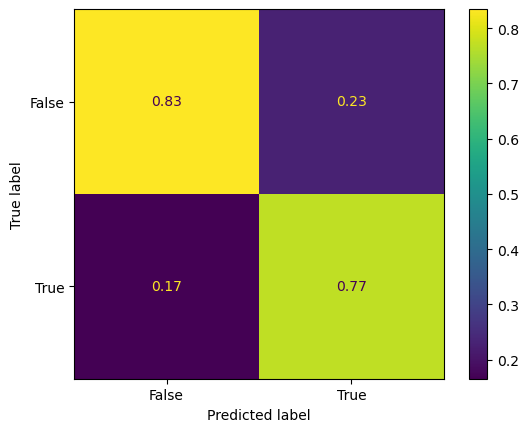

In [368]:
from sklearn.model_selection import cross_val_predict 

y_cross_pred= cross_val_predict(ab,X_train_scaled,y_train,cv=5)
accuracy_cross_ab = accuracy_score(y_train,y_cross_pred)


print("Accuracy cross validation Ada boost: ", accuracy_cross_ab)
#on utilise pas test car le dataset est deja assez grand
f_score_cross = f1_score(y_train, y_cross_pred)
print(f"\nF1 Score Ada boost avec valisation croisée: ", f_score_cross)
print(f"\nF1 Score ", f_score)
disp = ConfusionMatrixDisplay.from_predictions(y_train, y_cross_pred, normalize='pred')

recherche best param


In [286]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],        # Nombre d'estimateurs
    'learning_rate': [0.01, 0.1, 1.0],    # Taux d'apprentissage
}

# GridSearchCV avec validation croisée
ab_cv = GridSearchCV(
    estimator=ab,
    param_grid=param_grid,
    scoring='accuracy',  # Métrique principale
    cv=5,
    verbose=1
)

# Entraînement
#ab_cv.fit(X_train_scaled, y_train)


In [287]:
"""# Meilleurs paramètres
print("Meilleurs paramètres ada boost: ", ab_cv.best_params_)

# Évaluation sur le test set
best_model = ab_cv.best_estimator_
accuracy = accuracy_score(y_test, best_model.predict(X_test))
print("Accuracy sur le test set : ", accuracy)"""


'# Meilleurs paramètres\nprint("Meilleurs paramètres ada boost: ", ab_cv.best_params_)\n\n# Évaluation sur le test set\nbest_model = ab_cv.best_estimator_\naccuracy = accuracy_score(y_test, best_model.predict(X_test))\nprint("Accuracy sur le test set : ", accuracy)'

In [369]:
best_model_ada = AdaBoostClassifier(learning_rate=1.7,n_estimators=100)
best_model_ada.fit(X_train_scaled,y_train)
accuracy = accuracy_score(y_test, best_model_ada.predict(X_test_scaled))
print("Accuracy sur le test set : ", accuracy)

/home/acazeneu/.conda/envs/clustering-tp/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/acazeneu/.conda/envs/clustering-tp/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy sur le test set :  0.8150196915491688


enregistrement meilleur score

In [370]:
joblib.dump(best_model_ada,'AdaBoost_BestModel_08150.joblib')

['AdaBoost_BestModel_08150.joblib']

3. XGBoost

In [371]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train_scaled, y_train)

y_pred_xgb = xgb.predict(X_test_scaled)

Accuracy:  0.8250909418873824 
F1 Score:  0.7868083547086845


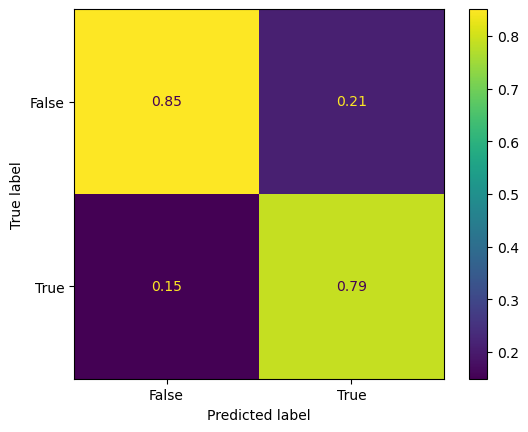

In [372]:
accuracy = accuracy_score(y_test, y_pred_xgb)
f_score = f1_score(y_test, y_pred_xgb)

print("Accuracy: ", accuracy, f"\nF1 Score: ", f_score)

disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_xgb, normalize='pred')

validation croisée 

Accuracy:  0.8239857698795784

F1 Score:  0.7846186860687315


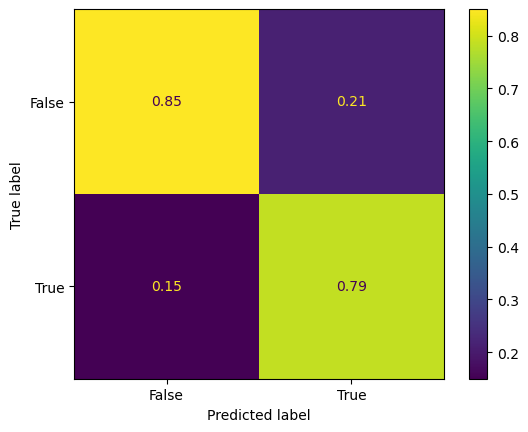

In [292]:
from sklearn.model_selection import cross_val_predict 

xgb_y_cross_pred= cross_val_predict(xgb,X_train_scaled,y_train,cv=5)
xgb_accuracy_cross = accuracy_score(y_train,xgb_y_cross_pred)


print("Accuracy: ", xgb_accuracy_cross)
f_score_cross = f1_score(y_train, xgb_y_cross_pred)
print(f"\nF1 Score: ", f_score_cross)

disp = ConfusionMatrixDisplay.from_predictions(y_train, xgb_y_cross_pred, normalize='pred')

3.2.2 Meilleur model


In [293]:
#On display les params pour trouver ceux qui seront interessants à changer
xgb.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [294]:
from sklearn.model_selection import GridSearchCV
# Définition de la grille de paramètres
param_grid = {
    'n_estimators': [100, 200, 300],  # Nombre d'arbres
    'max_depth': [3, 5, 7],           # Profondeur maximum des arbres
    'learning_rate': [0.01, 0.1, 0.2], # Taux d'apprentissage
    'subsample': [0.8, 1.0],          # Fraction des échantillons utilisée par arbre
    
}


# GridSearch avec validation croisée
xgb_cv = GridSearchCV(estimator=xgb, 
                           param_grid=param_grid, 
                           scoring='accuracy', 
                           cv=5, 
                           verbose=1)

# Exécution de la recherche
#xgb_cv.fit(X_train_scaled, y_train)

In [295]:
"""# Affichage des meilleurs paramètres
print("Meilleurs paramètres : ", xgb_cv.best_params_)

# Évaluation du meilleur modèle sur les données de test
best_model = xgb_cv.best_estimator_
accuracy = accuracy_score(y_test, best_model.predict(X_test))
print("Accuracy sur le test set : ", accuracy)"""

'# Affichage des meilleurs paramètres\nprint("Meilleurs paramètres : ", xgb_cv.best_params_)\n\n# Évaluation du meilleur modèle sur les données de test\nbest_model = xgb_cv.best_estimator_\naccuracy = accuracy_score(y_test, best_model.predict(X_test))\nprint("Accuracy sur le test set : ", accuracy)'

In [373]:
best_model = XGBClassifier(n_estimators=150, max_depth= 5,learning_rate=0.2, sub_sample=1)
best_model.fit(X_train_scaled,y_train)
accuracy = accuracy_score(y_test, best_model.predict(X_test_scaled))
print("Accuracy sur le test set : ", accuracy)

/home/acazeneu/.conda/envs/clustering-tp/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:13:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "sub_sample" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy sur le test set :  0.8248504344166191


In [374]:
joblib.dump(best_model,'XGB_BestModel_08248.joblib')

['XGB_BestModel_08248.joblib']

3.5 Inférence sur d'autres jeux de données

In [298]:
df_attributes_co = pd.read_csv('db_co/acsincome_co_features.csv')
df_labels_co = pd.read_csv('db_co/acsincome_co_label.csv')

df_attributes_ne = pd.read_csv('db_ne/acsincome_ne_features.csv')
df_labels_ne = pd.read_csv('db_ne/acsincome_ne_labelTP2.csv')


In [299]:
df_attributes_co


,AGEP,COW,SCHL,MAR,OCCP,POBP,RELP,WKHP,SEX,RAC1P
0,19.0,2.0,19.0,5.0,2850.0,6.0,17.0,2.0,2.0,9.0
1,24.0,5.0,18.0,5.0,9645.0,13.0,17.0,40.0,1.0,2.0
2,22.0,1.0,19.0,5.0,1520.0,53.0,17.0,45.0,2.0,1.0
3,32.0,1.0,16.0,1.0,4055.0,8.0,16.0,40.0,2.0,1.0
4,19.0,2.0,19.0,5.0,2006.0,34.0,17.0,9.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...
31301,52.0,1.0,21.0,1.0,5000.0,35.0,0.0,40.0,2.0,1.0
31302,54.0,1.0,19.0,1.0,910.0,35.0,1.0,40.0,1.0,1.0
31303,39.0,1.0,22.0,1.0,1021.0,207.0,0.0,40.0,1.0,6.0
31304,39.0,1.0,24.0,1.0,2205.0,207.0,1.0,40.0,2.0,6.0


In [300]:
df_attributes_ne 


,AGEP,COW,SCHL,MAR,OCCP,POBP,RELP,WKHP,SEX,RAC1P
0,19.0,1.0,19.0,5.0,3960.0,31.0,17.0,20.0,2.0,1.0
1,22.0,4.0,19.0,5.0,4622.0,46.0,17.0,30.0,1.0,1.0
2,19.0,1.0,19.0,5.0,6260.0,31.0,17.0,40.0,1.0,1.0
3,50.0,1.0,20.0,4.0,9620.0,31.0,17.0,10.0,1.0,1.0
4,18.0,1.0,18.0,5.0,3960.0,31.0,17.0,20.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
10780,59.0,1.0,20.0,5.0,1430.0,20.0,0.0,50.0,1.0,1.0
10781,59.0,3.0,22.0,3.0,1360.0,8.0,0.0,45.0,2.0,1.0
10782,62.0,1.0,19.0,3.0,20.0,19.0,0.0,50.0,2.0,1.0
10783,47.0,1.0,16.0,5.0,6050.0,31.0,0.0,65.0,1.0,1.0


On réutilise le scaler précédent pour fit les nouveaux jeux de données, et on va prédire avec nos modeles entrainés

In [301]:
X_ne_scaled = scaler.fit_transform(df_attributes_ne)
X_co_scaled = scaler.fit_transform(df_attributes_co)

In [302]:
y_ne_rf = rf.predict(X_ne_scaled)
y_co_rf = rf.predict(X_co_scaled)

/home/acazeneu/.conda/envs/clustering-tp/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/home/acazeneu/.conda/envs/clustering-tp/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [303]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Évaluer les prédictions pour le Nevada
accuracy_nevada = accuracy_score(df_labels_ne, y_ne_rf)
conf_matrix_nevada = confusion_matrix(df_labels_ne, y_ne_rf)
print("Nevada Accuracy:", accuracy_nevada)
print("Nevada Confusion Matrix:\n", conf_matrix_nevada)



# Évaluer les prédictions pour le Colorado
accuracy_co = accuracy_score(df_labels_co, y_co_rf)
conf_matrix_co = confusion_matrix(df_labels_co, y_co_rf)
print("Nevada Accuracy:", accuracy_co)
print("Nevada Confusion Matrix:\n", conf_matrix_co)


Nevada Accuracy: 0.6534075104311544
Nevada Confusion Matrix:
 [[4829 2588]
 [1150 2218]]
Nevada Accuracy: 0.658883281160161
Nevada Confusion Matrix:
 [[11131  7203]
 [ 3476  9496]]


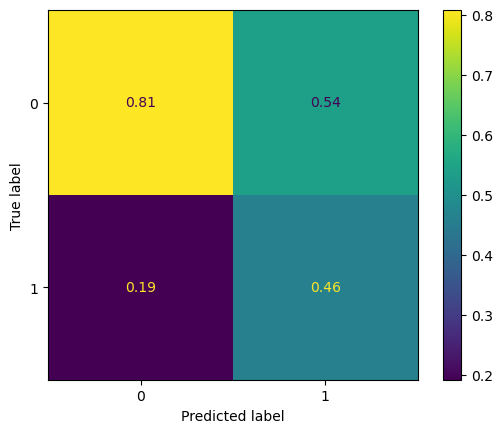

In [304]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay.from_predictions(df_labels_ne, y_ne_rf, normalize='pred')

pas ouf ouf ce random forest

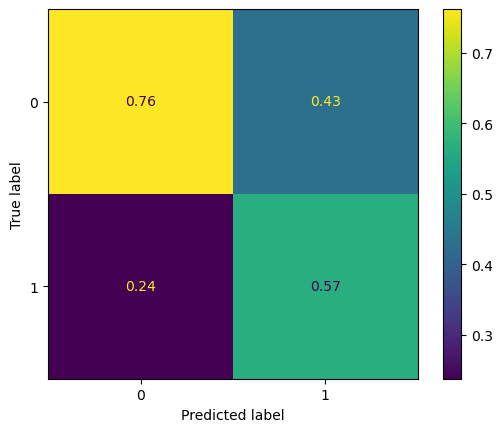

In [305]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay.from_predictions(df_labels_co, y_co_rf, normalize='pred')

/home/acazeneu/.conda/envs/clustering-tp/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
/home/acazeneu/.conda/envs/clustering-tp/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


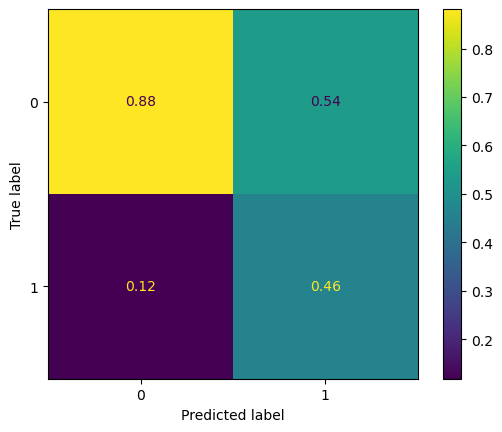

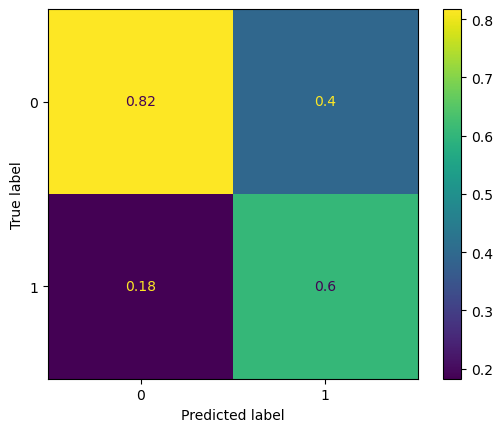

In [306]:
y_ne_rf = ab.predict(X_ne_scaled)
y_co_rf = ab.predict(X_co_scaled)

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Évaluer les prédictions pour le Nevada
accuracy_nevada = accuracy_score(df_labels_ne, y_ne_rf)
conf_matrix_nevada = confusion_matrix(df_labels_ne, y_ne_rf)

accuracy_nevada
conf_matrix_nevada

# Évaluer les prédictions pour le Colorado
accuracy_co = accuracy_score(df_labels_co, y_co_rf)
conf_matrix_co = confusion_matrix(df_labels_co, y_co_rf)

accuracy_co
conf_matrix_co


disp1 = ConfusionMatrixDisplay.from_predictions(df_labels_ne, y_ne_rf, normalize='pred')
disp2 = ConfusionMatrixDisplay.from_predictions(df_labels_co, y_co_rf, normalize='pred')


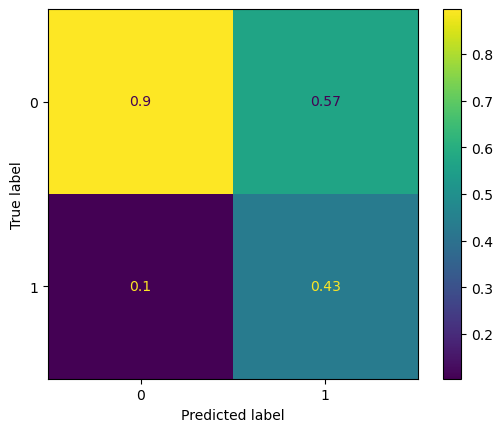

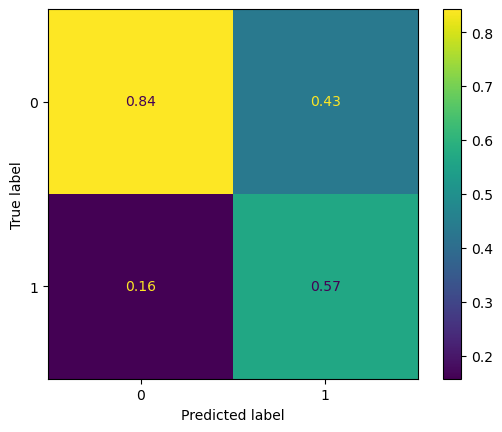

In [307]:
y_ne_rf = xgb.predict(X_ne_scaled)
y_co_rf = xgb.predict(X_co_scaled)

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Évaluer les prédictions pour le Nevada
accuracy_nevada = accuracy_score(df_labels_ne, y_ne_rf)
conf_matrix_nevada = confusion_matrix(df_labels_ne, y_ne_rf)

accuracy_nevada
conf_matrix_nevada

# Évaluer les prédictions pour le Colorado
accuracy_co = accuracy_score(df_labels_co, y_co_rf)
conf_matrix_co = confusion_matrix(df_labels_co, y_co_rf)

accuracy_co
conf_matrix_co


disp1 = ConfusionMatrixDisplay.from_predictions(df_labels_ne, y_ne_rf, normalize='pred')
disp2 = ConfusionMatrixDisplay.from_predictions(df_labels_co, y_co_rf, normalize='pred')


#### 4. Interprétabilité et Equité

In [308]:
from sklearn.feature_selection import r_regression
from matplotlib.colors import Normalize

def correlation(feature, label, title):
    corr=r_regression(feature,label)
    norm= Normalize(min(corr),max(corr))
    cmap=plt.cm.cividis
    colors = cmap(norm(corr))
    
    plt.barh(feature.columns, corr, color=colors)
    plt.axvline(0,color='pink')
    plt.ylabel("features")
    plt.xlabel("Labels")
    plt.title(title)


/home/acazeneu/.conda/envs/clustering-tp/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


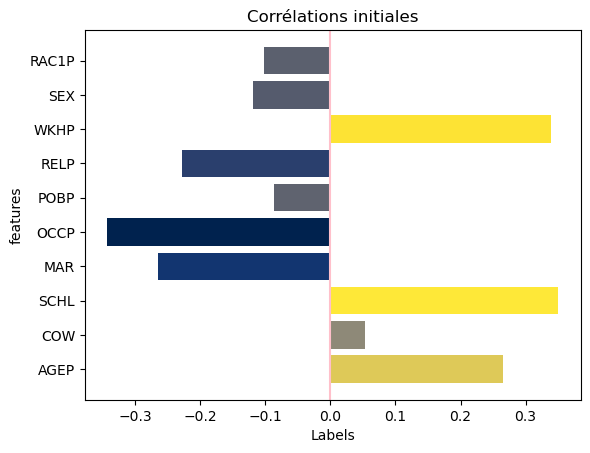

In [309]:
correlation(df_attributes,df_labels,"Corrélations initiales")

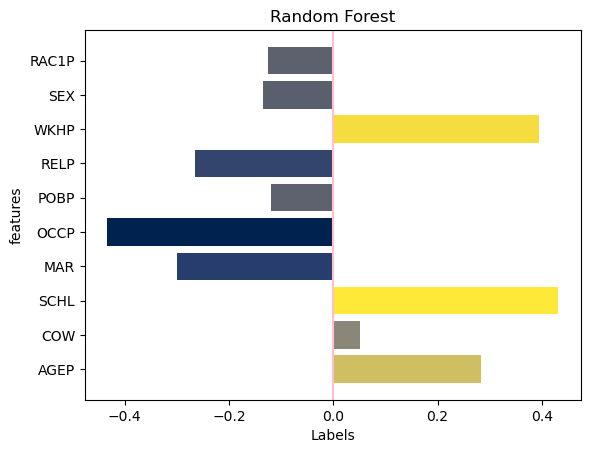

In [310]:
correlation(X_test_scaled,y_pred_rf,"Random Forest")

In [311]:
#  RandomForest 
importances = rf.feature_importances_


feature_importance_df = pd.DataFrame({
    'feature': X_train_scaled.columns,  
    'importance': importances
})

#trier ordre croissant
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)
print(feature_importance_df)


  feature  importance
4    OCCP    0.270784
0    AGEP    0.171423
7    WKHP    0.140284
2    SCHL    0.126397
5    POBP    0.085600
6    RELP    0.074302
1     COW    0.043464
3     MAR    0.033922
9   RAC1P    0.032512
8     SEX    0.021313


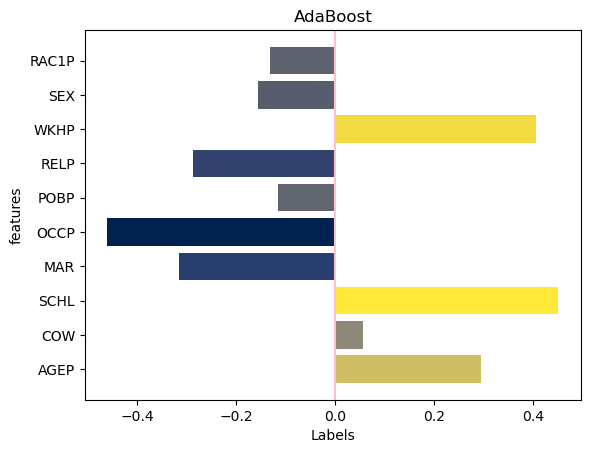

In [312]:
correlation(X_test_scaled,y_pred_ab,"AdaBoost")

In [313]:
#  adaboost
importances = ab.feature_importances_


feature_importance_df = pd.DataFrame({
    'feature': X_train_scaled.columns,  
    'importance': importances
})

#trier ordre croissant
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)
print(feature_importance_df)
.2

  feature  importance
4    OCCP        0.40
0    AGEP        0.14
7    WKHP        0.14
2    SCHL        0.08
6    RELP        0.08
1     COW        0.06
5    POBP        0.04
3     MAR        0.02
8     SEX        0.02
9   RAC1P        0.02


0.2

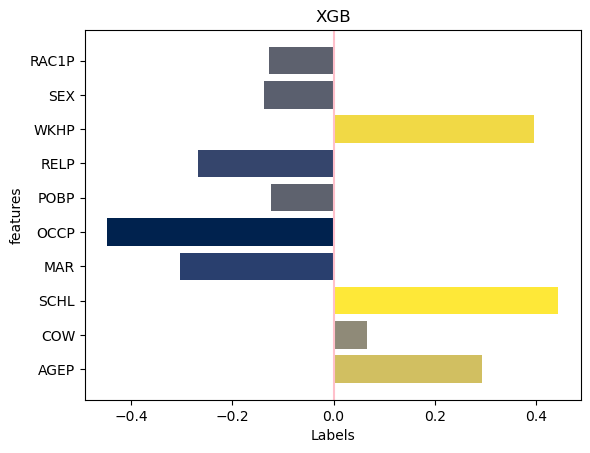

In [314]:
correlation(X_test_scaled,y_pred_xgb,"XGB")

In [315]:
#  XGB
importances = xgb.feature_importances_


feature_importance_df = pd.DataFrame({
    'feature': X_train_scaled.columns,  
    'importance': importances
})

#trier ordre croissant
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)
print(feature_importance_df)


  feature  importance
7    WKHP    0.179109
6    RELP    0.168179
4    OCCP    0.162301
2    SCHL    0.153532
8     SEX    0.125415
0    AGEP    0.074258
1     COW    0.043802
3     MAR    0.038356
5    POBP    0.034011
9   RAC1P    0.021038


TODO : inférence à la main

In [316]:

# Entraînement du modèle avec les meilleurs hyperparamètres trouvés
model = joblib.load('RandomForest_BestModel_08179.joblib')

# Sélection aléatoire de 3 échantillons dans le dataset de test
random_indices = np.random.choice(X_test.index, size=3, replace=False)
random_samples = X_test.loc[random_indices]
random_targets = y_test.loc[random_indices]

# Prédictions sur les échantillons sélectionnés
predictions = model.predict(random_samples)

# Importance des features
importances = model.feature_importances_
features = random_samples.columns

# Analyse des prédictions
for i, (index, sample) in enumerate(random_samples.iterrows()):
    print(f"Échantillon {i+1} (Index {index}):")
    print(sample.to_dict())  # Affiche les valeurs des features pour cet échantillon
    print(f"Cible réelle: {random_targets.loc[index]}")
    print(f"Prédiction du modèle: {predictions[i]}")
    
    # Trier les features par importance et afficher leurs valeurs
    sorted_importances = sorted(
        zip(features, importances), key=lambda x: x[1], reverse=True
    )
    for feature, importance in sorted_importances:
        print(f"- {feature}: valeur = {sample[feature]}, importance = {importance:.4f}")
    print("\n" + "-"*50 + "\n")

Échantillon 1 (Index 128336):
{'AGEP': 0.6219989245407704, 'COW': 1.0, 'SCHL': 16.0, 'MAR': 4.0, 'OCCP': 6040.0, 'POBP': 303.0, 'RELP': 0.0, 'WKHP': -0.607231550753679, 'SEX': 2.0, 'RAC1P': 8.0}
Cible réelle: PINCP    False
Name: 128336, dtype: bool
Prédiction du modèle: False
- OCCP: valeur = 6040.0, importance = 0.2661
- WKHP: valeur = -0.607231550753679, importance = 0.1593
- SCHL: valeur = 16.0, importance = 0.1560
- AGEP: valeur = 0.6219989245407704, importance = 0.1436
- RELP: valeur = 0.0, importance = 0.0907
- POBP: valeur = 303.0, importance = 0.0700
- COW: valeur = 1.0, importance = 0.0346
- MAR: valeur = 4.0, importance = 0.0317
- SEX: valeur = 2.0, importance = 0.0248
- RAC1P: valeur = 8.0, importance = 0.0231

--------------------------------------------------

Échantillon 2 (Index 87011):
{'AGEP': 1.0249740001132375, 'COW': 1.0, 'SCHL': 22.0, 'MAR': 1.0, 'OCCP': 1400.0, 'POBP': 240.0, 'RELP': 0.0, 'WKHP': 0.16192203314671644, 'SEX': 1.0, 'RAC1P': 6.0}
Cible réelle: PINCP 


4.2 Equité des modèles

In [317]:
print(df_labels.columns)  # Liste des colonnes disponibles
print(df_labels.head())   # Aperçu des premières lignes pour repérer la cible


Index(['PINCP'], dtype='object')
   PINCP
0   True
1   True
2  False
3   True
4  False


In [318]:
train_data = pd.concat([X_train_scaled, y_train], axis=1)


# overall_rate = train_data['PINCP'].mean()  
# men_rate = train_data[train_data['SEX'] == 1]['PINCP'].mean()
# women_rate = train_data[train_data['SEX'] == 2]['PINCP'].mean()

all_data = pd.concat([df_attributes, df_labels], axis=1)

overall_rate = all_data['PINCP'].mean()  
men_rate = all_data[all_data['SEX'] == 1]['PINCP'].mean()
women_rate = all_data[all_data['SEX'] == 2]['PINCP'].mean()

print(f"Taux global : {overall_rate:.2%}")
print(f"Taux hommes : {men_rate:.2%}")
print(f"Taux femmes : {women_rate:.2%}")


Taux global : 41.01%
Taux hommes : 46.53%
Taux femmes : 34.83%


In [319]:
rf_best = joblib.load('RandomForest_BestModel_08179.joblib')
ab_best = joblib.load('AdaBoost_BestModel_08150.joblib')
xgb_best = joblib.load('XGB_BestModel_08248.joblib')

In [320]:
eval_data = pd.concat([X_test_scaled, y_test], axis=1)

eval_data.head()

,AGEP,COW,SCHL,MAR,OCCP,POBP,RELP,WKHP,SEX,RAC1P,PINCP
21546,0.017536,3.0,23.0,1.0,2310.0,254.0,1.0,0.161922,2.0,1.0,True
116870,0.219024,4.0,16.0,1.0,3424.0,233.0,0.0,0.161922,1.0,6.0,True
96563,-0.654089,1.0,7.0,5.0,6260.0,303.0,12.0,0.161922,1.0,1.0,False
92421,1.427949,3.0,19.0,3.0,3602.0,6.0,0.0,1.700229,1.0,1.0,False
79799,-0.922739,1.0,19.0,5.0,5230.0,6.0,0.0,0.161922,2.0,2.0,False


Matrice de confusion pour le model XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) et le genre 1 :
  [[0.44071639 0.09635003]
 [0.08399456 0.37893902]]
Matrice de confusion pour le model AdaBoostClassifier(learning_rate=1.7, n_estimators=100) et le genre 1 :
  [[0.43436862 0.1026978 ]
 [0.08818

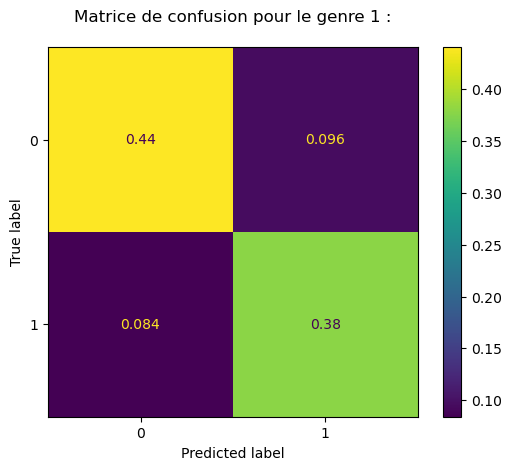

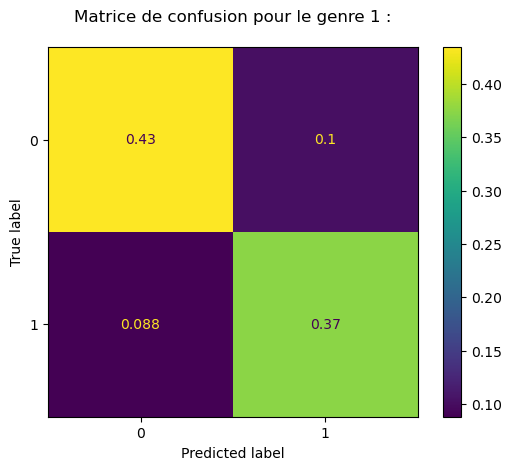

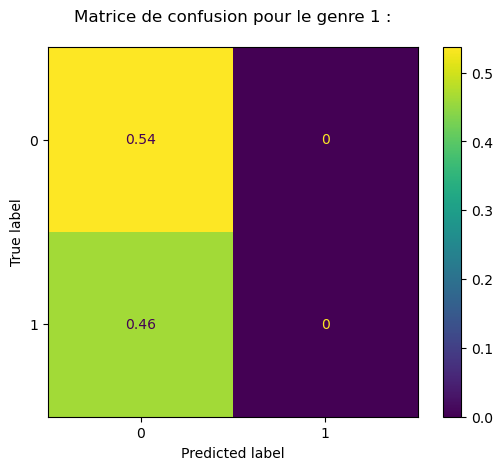

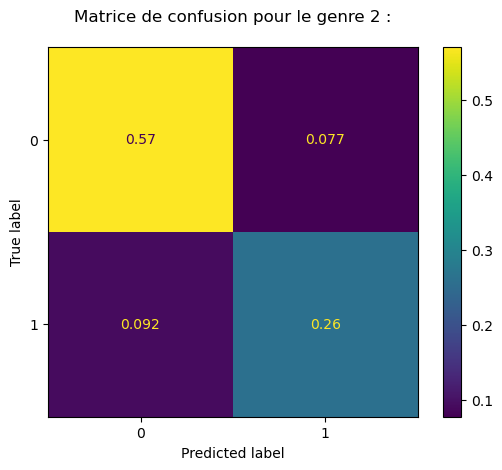

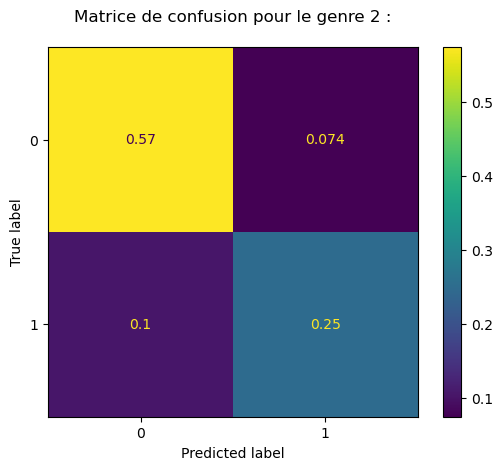

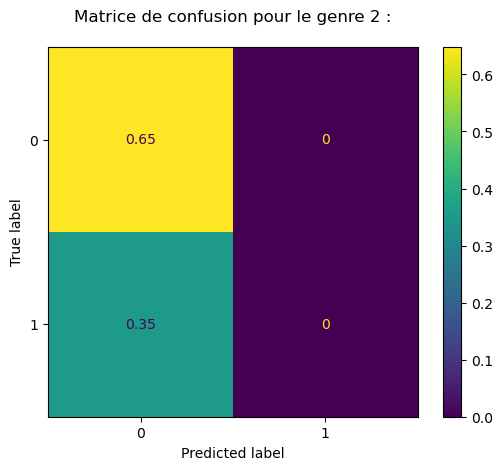

In [ ]:
from sklearn.metrics import  ConfusionMatrixDisplay


metrics = {
    "Statistical Parity": {},
    "Equal Opportunity": {},
    "Predictive Equality": {}
}

# Calcul des métriques par genre
for  label in  [1, 2]:
    data=eval_data[eval_data['SEX']==label]
    X = data.drop(columns='PINCP')
    y_true = data['PINCP'] 
    
    for model in [xgb_best,ab_best,rf_best]:
        y_pred=model.predict(X)
        # Matrice de confusion
        cm = confusion_matrix(y_true, y_pred, normalize='all')
        tn, fp, fn, tp = cm.ravel()

        # statistical parity
        sp = (tp + fp) / (tn + fp + fn + tp)
        metrics['Statistical Parity'].setdefault(model, {})[label] = sp

        # equal opportunity
        eo = tp / (tp + fn)
        metrics['Equal Opportunity'].setdefault(model, {})[label] = eo

        # predictive equality
        pe = fp / (fp + tn)
        metrics['Predictive Equality'].setdefault(model, {})[label] = pe

        print(f"Matrice de confusion pour le model {model} et le genre {label} :\n ", cm)
        ConfusionMatrixDisplay(cm).plot()
        plt.title(f"Matrice de confusion pour le genre {label} :\n ")


print(metrics)


In [322]:
for metric_name, metric_values in metrics.items():
    print(f"\n### {metric_name} ###")
    for model, values in metric_values.items():
        print(f"Modèle: {model}")
        print(f"Hommes (1): {values.get(1, 'Non calculé')}")
        print(f"Femmes (2): {values.get(2, 'Non calculé')}")
        if 1 in values and 2 in values:
            diff = abs(values[1] - values[2])
            print(f"Différence absolue entre hommes et femmes: {diff:.4f}")




### Statistical Parity ###
Modèle: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
Hommes (1): 0.4752890501020177
Femmes (2): 0.3372174915167424
Différence absolue entre hommes et femmes: 0.1381
Modèle: AdaBoostClassifier(learning_rate=1.7, n_estimators=100)
Hommes (1): 0.47744275674450243
Fem

In [323]:
X_train_scaled_neutral = X_train_scaled.drop(columns=['SEX'])

X_train_scaled_neutral

,AGEP,COW,SCHL,MAR,OCCP,POBP,RELP,WKHP,RAC1P
165496,-0.519764,1.0,21.0,5.0,1306.0,6.0,13.0,0.161922,1.0
157067,0.017536,1.0,21.0,1.0,310.0,247.0,1.0,0.161922,6.0
36293,-0.318276,1.0,19.0,5.0,8225.0,6.0,2.0,0.623414,8.0
151543,-0.049626,1.0,19.0,1.0,705.0,6.0,1.0,0.161922,2.0
148747,-0.721251,2.0,21.0,4.0,2145.0,27.0,0.0,1.700229,1.0
...,...,...,...,...,...,...,...,...,...
20563,-1.392876,1.0,19.0,5.0,3500.0,247.0,10.0,0.161922,6.0
45414,-0.922739,1.0,21.0,5.0,110.0,39.0,0.0,0.931076,1.0
92206,0.554836,2.0,21.0,1.0,4020.0,6.0,1.0,-2.145539,6.0
52487,-0.788414,1.0,19.0,1.0,4720.0,4.0,0.0,-0.453401,1.0


In [324]:
ab_neutral = AdaBoostClassifier()
ab_neutral.fit(X_train_scaled_neutral, y_train)

/home/acazeneu/.conda/envs/clustering-tp/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/acazeneu/.conda/envs/clustering-tp/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

In [325]:
# joblib.dump(rf_cv, 'RandomForest_BestModel_08179.joblib', compress=3)


['RandomForest_BestModel_08179.joblib']

In [326]:
ab_neutral_same_parameters = AdaBoostClassifier(n_estimators=260, learning_rate=1.7)
ab_neutral_same_parameters.fit(X_train_scaled_neutral, y_train)
print(X_train_scaled_neutral.shape, y_train.shape)

/home/acazeneu/.conda/envs/clustering-tp/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/acazeneu/.conda/envs/clustering-tp/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


(119746, 9) (119746, 1)


Matrice de confusion pour le genre 1 :
 [[0.45312854 0.08393788]
 [0.10309454 0.35983904]]


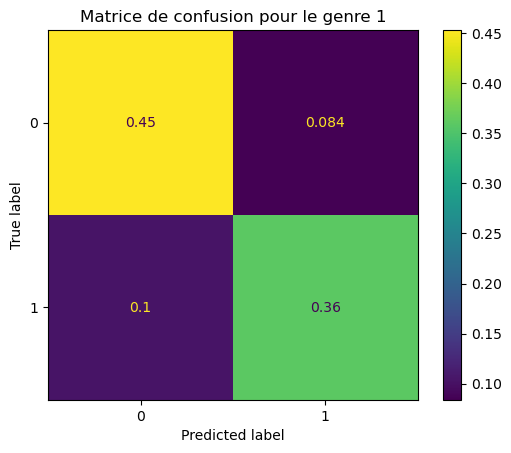

Matrice de confusion pour le genre 2 :
 [[0.55605352 0.09174723]
 [0.08380818 0.26839106]]


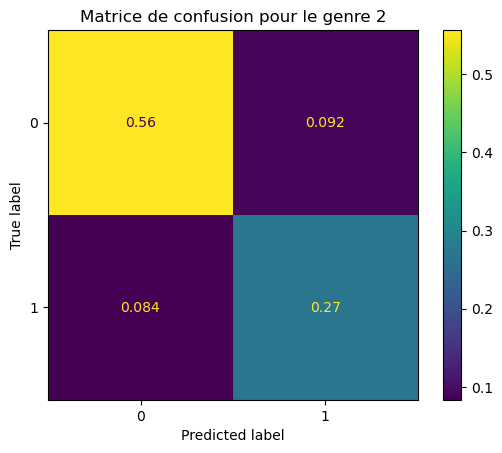

In [327]:
metrics2 = {
    "Statistical Parity": {},
    "Equal Opportunity": {},
    "Predictive Equality": {}
}


for label in [1, 2]:
    data = eval_data[eval_data['SEX'] == label]
    X = data.drop(columns=['PINCP', 'SEX'])
    y_true = data['PINCP']
    y_pred = ab_neutral_same_parameters.predict(X)

    cm = confusion_matrix(y_true, y_pred, normalize='all')
    print(f"Matrice de confusion pour le genre {label} :\n", cm)
    ConfusionMatrixDisplay(cm).plot()
    plt.title(f"Matrice de confusion pour le genre {label}")
    plt.show()

    tn, fp, fn, tp = cm.ravel()

    sp = (tp + fp) / (tp + fp + tn + fn)
    metrics2["Statistical Parity"][label] = sp
    
    eo = tp / (tp + fn) 
    metrics2["Equal Opportunity"][label] = eo
    
    pe = fp / (fp + tn)
    metrics2["Predictive Equality"][label] = pe


In [328]:
for metric_name, values in metrics2.items():
    print(f"\n### {metric_name} ###")
    print(f"Hommes (1): {values[1]:.4f}")
    print(f"Femmes (2): {values[2]:.4f}")
    diff = abs(values[1] - values[2])
    print(f"Différence absolue entre hommes et femmes : {diff:.4f}")




### Statistical Parity ###
Hommes (1): 0.4438
Femmes (2): 0.3601
Différence absolue entre hommes et femmes : 0.0836

### Equal Opportunity ###
Hommes (1): 0.7773
Femmes (2): 0.7620
Différence absolue entre hommes et femmes : 0.0153

### Predictive Equality ###
Hommes (1): 0.1563
Femmes (2): 0.1416
Différence absolue entre hommes et femmes : 0.0147


In [329]:
#  adaboost
importances = ab_neutral_same_parameters.feature_importances_


feature_importance_df = pd.DataFrame({
    'feature': X_train_scaled_neutral.columns,  
    'importance': importances
})

#trier ordre croissant
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)
print(feature_importance_df)
.2

  feature  importance
4    OCCP    0.565385
7    WKHP    0.100000
0    AGEP    0.084615
2    SCHL    0.057692
5    POBP    0.057692
1     COW    0.050000
6    RELP    0.038462
3     MAR    0.023077
8   RAC1P    0.023077


0.2

In [330]:
y_pred_neutral = ab_neutral_same_parameters.predict(X_test_scaled.drop(columns=['SEX']))

accuracy = accuracy_score(y_test, y_pred_neutral)
print(accuracy)


0.8183567327060097
